In [151]:
import pandas as pd
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [155]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [157]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing regression algorithms.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [161]:
df.describe()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,202.000000,165.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.831683,121.836364,98.848020,174.273267,65.903960,53.775248,2558.173267,126.945545,10.160990,25.148515,30.658416,13253.752475
std,1.258360,35.396412,6.094523,12.334330,2.106915,2.444769,517.236654,41.455269,3.995264,6.421956,6.809940,7954.919591
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,8.600000,19.000000,25.000000,7778.250000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,24.000000,30.000000,10320.000000
75%,2.000000,150.000000,102.400000,183.500000,66.825000,55.500000,2932.750000,141.000000,9.400000,30.000000,34.000000,16502.250000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [163]:
df.info

<bound method DataFrame.info of      symboling  normalized-losses         make fuel-type aspiration  \
0            3                NaN  alfa-romero       gas        std   
1            3                NaN  alfa-romero       gas        std   
2            1                NaN  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
197         -1               95.0        volvo       gas      turbo   
198         -1               95.0        volvo       gas        std   
199         -1               95.0        volvo    diesel      turbo   
200         -1               95.0        volvo       gas      turbo   
201         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible       

In [165]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [167]:
df.tail(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
192,-2,103.0,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
193,-1,74.0,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
194,-2,103.0,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
195,-1,74.0,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
200,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [169]:
df.shape

(202, 26)

In [171]:
df.isnull().sum()

symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

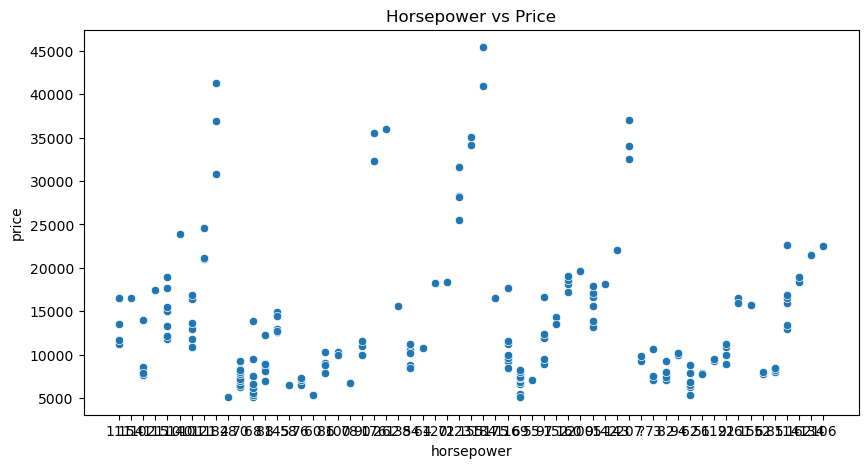

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of horsepower vs price
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['horsepower'], y=df['price'])
plt.title('Horsepower vs Price')
plt.show()

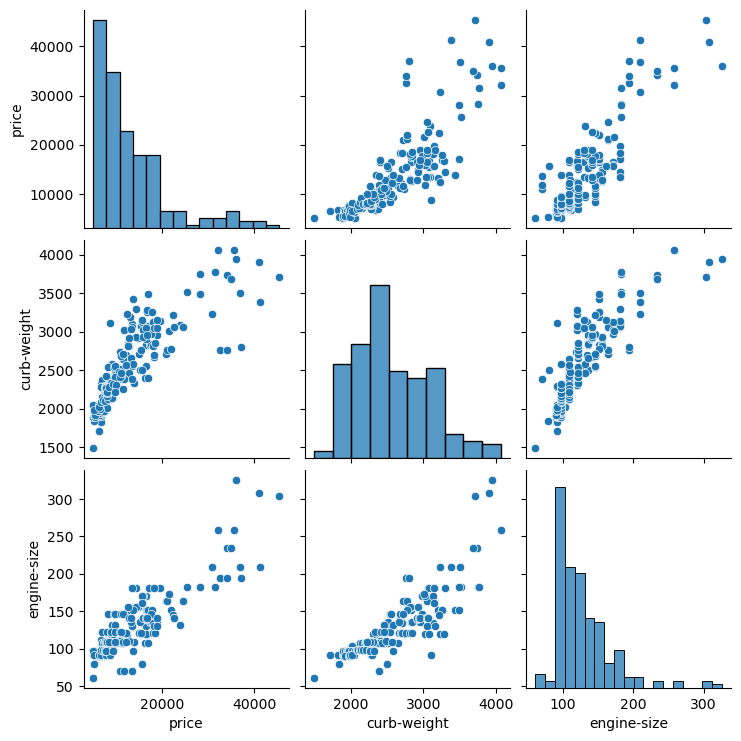

In [175]:
sns.pairplot(df[['price', 'curb-weight', 'engine-size', 'horsepower']])
plt.show()

In [176]:
import seaborn as sns

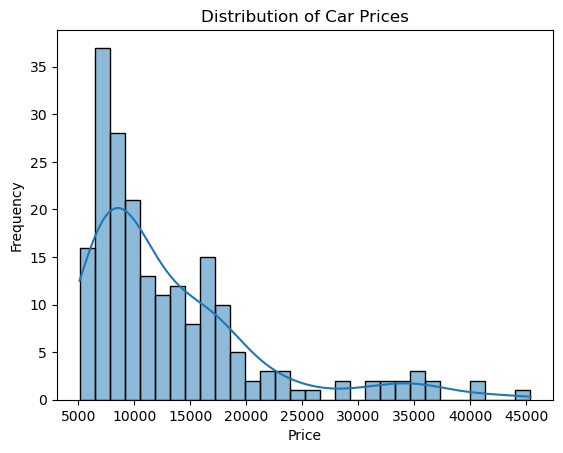

In [177]:
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [178]:
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
df['normalized-losses'] = median_imputer.fit_transform(df[['normalized-losses']])

In [183]:
mode_imputer = SimpleImputer(strategy='most_frequent')
df['num-of-doors'] = mode_imputer.fit_transform(df[['num-of-doors']]).ravel()

In [185]:
print("\nRemaining missing values in the dataset:")
print(df.isnull().sum())


Remaining missing values in the dataset:
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [187]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

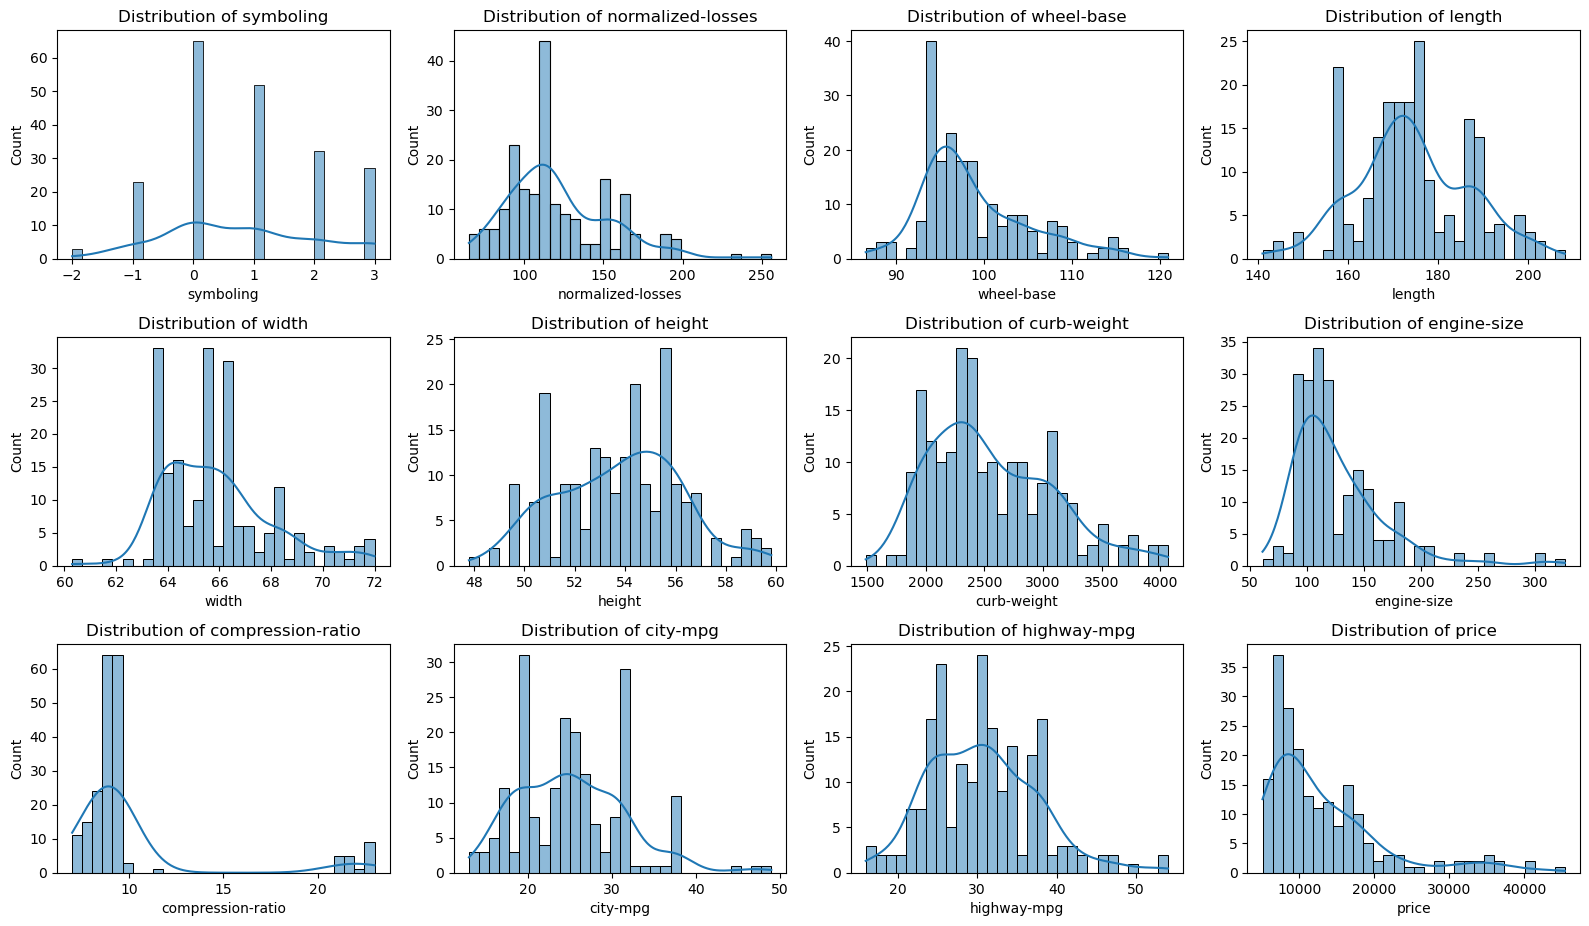

In [189]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

In [190]:
cat_cols = df.select_dtypes(include=['object']).columns

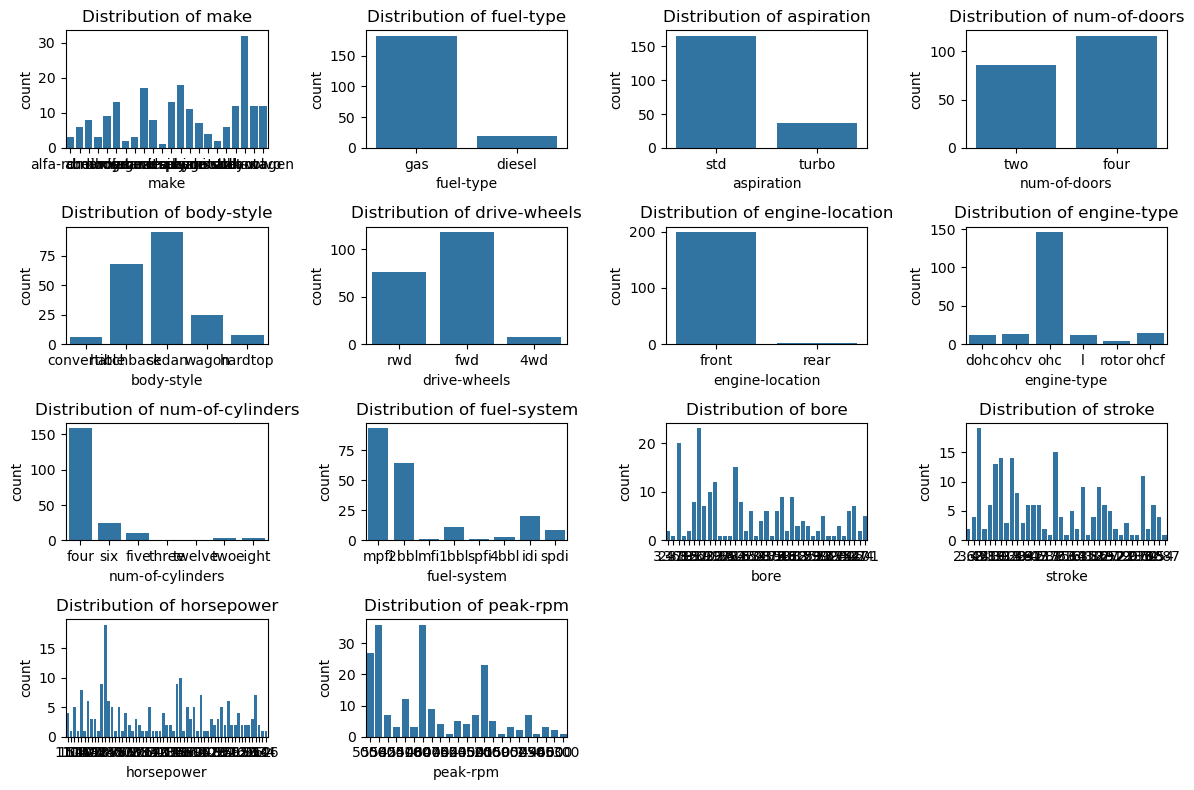

In [191]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

In [192]:
cat_cols = df.select_dtypes(include=['object']).columns

In [193]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [194]:
print(df_encoded.head())

   symboling  normalized-losses  wheel-base  length  width  height  \
0          3              115.0        88.6   168.8   64.1    48.8   
1          3              115.0        88.6   168.8   64.1    48.8   
2          1              115.0        94.5   171.2   65.5    52.4   
3          2              164.0        99.8   176.6   66.2    54.3   
4          2              164.0        99.4   176.6   66.4    54.3   

   curb-weight  engine-size  compression-ratio  city-mpg  ...  peak-rpm_5250  \
0         2548          130                9.0        21  ...          False   
1         2548          130                9.0        21  ...          False   
2         2823          152                9.0        19  ...          False   
3         2337          109               10.0        24  ...          False   
4         2824          136                8.0        18  ...          False   

   peak-rpm_5300  peak-rpm_5400  peak-rpm_5500  peak-rpm_5600  peak-rpm_5800  \
0          False  

In [195]:
import numpy as np
skewed_feats = df_encoded[num_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
print("Skewed Features:")
print(skewed_feats[abs(skewed_feats) > 0.5])  # Adjust threshold as needed

for col in skewed_feats[skewed_feats > 0.5].index:
    df_encoded[col] = np.log1p(df_encoded[col])  # log1p is log(1+x) to avoid log(0)

print("Skewness After Transformation:")
print(df_encoded[num_cols].apply(lambda x: x.skew()).sort_values(ascending=False))

Skewed Features:
compression-ratio    2.592726
engine-size          1.977365
price                1.785834
wheel-base           1.010842
normalized-losses    0.964381
width                0.857130
curb-weight          0.692532
city-mpg             0.687371
highway-mpg          0.557602
dtype: float64
Skewness After Transformation:
compression-ratio    2.375371
engine-size          0.867032
wheel-base           0.849975
width                0.769915
price                0.663321
curb-weight          0.273214
symboling            0.200931
normalized-losses    0.182498
length               0.143794
city-mpg             0.027554
height               0.020291
highway-mpg         -0.100800
dtype: float64


In [196]:
features_to_transform = ['compression-ratio', 'engine-size', 'price', 'wheel-base', 'normalized-losses', 'width']

In [199]:
for col in features_to_transform:
    if df_encoded[col].skew() > 0.5:  # Check if skewness is still high
        df_encoded[col] = np.log1p(df_encoded[col])  # log(1+x)

In [200]:
print("Skewness After Further Transformations:")
print(df_encoded[features_to_transform].apply(lambda x: x.skew()).sort_values(ascending=False))

Skewness After Further Transformations:
compression-ratio    2.280781
wheel-base           0.821346
width                0.753077
engine-size          0.706290
price                0.569134
normalized-losses    0.182498
dtype: float64


In [201]:
from sklearn.preprocessing import StandardScaler
num_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
print(df_encoded.head())

   symboling  normalized-losses  wheel-base    length     width    height  \
0   1.727411          -0.056964   -1.814736 -0.444845 -0.866254 -2.040114   
1   1.727411          -0.056964   -1.814736 -0.444845 -0.866254 -2.040114   
2   0.134091          -0.056964   -0.720775 -0.249783 -0.177009 -0.563924   
3   0.930751           1.333702    0.196007  0.189107  0.161156  0.215176   
4   0.930751           1.333702    0.128818  0.189107  0.257003  0.215176   

   curb-weight  engine-size  compression-ratio  city-mpg  ...  peak-rpm_5250  \
0     0.079106     0.262584          -0.244032 -0.593191  ...          False   
1     0.079106     0.262584          -0.244032 -0.593191  ...          False   
2     0.602386     0.816086          -0.244032 -0.987229  ...          False   
3    -0.362209    -0.378130           0.152420 -0.064692  ...          False   
4     0.604194     0.423744          -0.695828 -1.199290  ...          False   

   peak-rpm_5300  peak-rpm_5400  peak-rpm_5500  peak-rpm

In [202]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']  

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (141, 214)
X_test shape: (61, 214)
y_train shape: (141,)
y_test shape: (61,)


In [204]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [205]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    "Support Vector Regression": SVR()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test) 
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        "Mean Absolute Error (MAE)": mae,
        "Mean Squared Error (MSE)": mse,
        "R-squared": r2
    }
results_df = pd.DataFrame(results).T
print(results_df)

                           Mean Absolute Error (MAE)  \
Linear Regression                       3.945802e+10   
Decision Tree                           2.479369e-01   
Random Forest                           2.370823e-01   
KNN                                     3.098666e-01   
Support Vector Regression               2.364644e-01   

                           Mean Squared Error (MSE)     R-squared  
Linear Regression                      1.312899e+22 -1.054730e+22  
Decision Tree                          1.135318e-01  9.087932e-01  
Random Forest                          8.421046e-02  9.323488e-01  
KNN                                    1.801531e-01  8.552723e-01  
Support Vector Regression              8.139777e-02  9.346084e-01  


In [206]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [219]:
rf_model = RandomForestRegressor(random_state=72)

In [222]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=72)

In [224]:
y_pred = rf_model.predict(X_test)


In [227]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [229]:
print(f"Random Forest Model Performance (Default Parameters):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Random Forest Model Performance (Default Parameters):
Mean Absolute Error (MAE): 0.24
Mean Squared Error (MSE): 0.09
R-squared: 0.93


In [231]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame(importances, index=X.columns, columns=["Importance"]).sort_values("Importance", ascending=False)

In [233]:
print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
               Importance
curb-weight      0.713620
engine-size      0.122563
highway-mpg      0.039580
city-mpg         0.028999
width            0.016203
...                   ...
make_renault     0.000000
bore_3.76        0.000000
bore_3.94        0.000000
horsepower_64    0.000000
peak-rpm_?       0.000000

[214 rows x 1 columns]
